#### what is scallling and why we need it?
 
>all the data we have, has a unit and magnitude to it.            
 if we feed this data to the machine as it is then its huge load on computation to learn patters in that data 
 so we scale down this to same level using different scalling techniques.             
 
 

#### where to use it

>algorithms like linear regression, logistic regression, knn, kmeans, all the neural networks                                
>do not require in algos like dicision trees, random forest(ensemble techniques), XGboost, adaboost 


#### what are techniques to scale down data?
>Standardization                            
 Normalization                                      
 Gaussian scalling techniques :               
     >>mean-quantile(Robust Scalar)                                       
     >>reciprocal scalling                       
     >>square root scalling                             
     >>exponential scalling                         
     >>logarithemic scalling                                 
     >>BoxCox scalling transformation                         

## min max scalar / Normalization

x_scaled = X(i) - Xmin / Xmax - Xmin                         

In [1]:
import pandas as pd
df = pd.read_csv("titanic.csv",usecols=["Survived","Pclass","Age"])

In [2]:
df

,Survived,Pclass,Age
0,0,3,22.0
1,1,1,38.0
2,1,3,26.0
3,1,1,35.0
4,0,3,35.0
...,...,...,...
886,0,2,27.0
887,1,1,19.0
888,0,3,NaN
889,1,1,26.0


In [3]:
df.isnull().sum()

Survived      0
Pclass        0
Age         177
dtype: int64

In [5]:
df["Age"]=df["Age"].fillna(df.Age.median())

In [6]:
df.isnull().sum()

Survived    0
Pclass      0
Age         0
dtype: int64

In [8]:
from sklearn.preprocessing import MinMaxScaler

In [13]:
minmax = MinMaxScaler()
df_scalad = minmax.fit_transform(df)

In [18]:
df_scaled= pd.DataFrame(df_scalad,columns=df.columns)

In [19]:
df_scaled.head()

,Survived,Pclass,Age
0,0.0,1.0,0.271174
1,1.0,0.0,0.472229
2,1.0,1.0,0.321438
3,1.0,0.0,0.434531
4,0.0,1.0,0.434531


<AxesSubplot:>

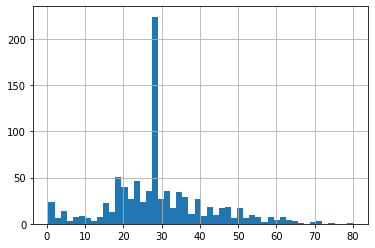

In [23]:
df.Age.hist(bins=50)

<AxesSubplot:>

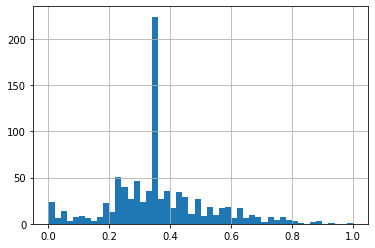

In [25]:
df_scaled.Age.hist(bins=50)

## Standard Scalar

x_scaled = X(i) - Xmean / std 

In [26]:
df = pd.read_csv("titanic.csv",usecols=["Survived","Pclass","Age"])

In [28]:
df["Age"]=df["Age"].fillna(df.Age.median())

In [29]:
df.head()

,Survived,Pclass,Age
0,0,3,22.0
1,1,1,38.0
2,1,3,26.0
3,1,1,35.0
4,0,3,35.0


<AxesSubplot:>

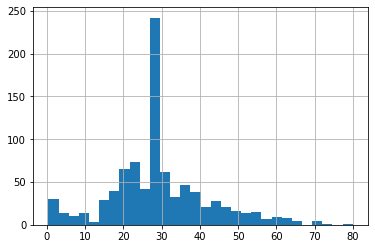

In [31]:
df.Age.hist(bins=30)

In [32]:
from sklearn.preprocessing import StandardScaler

In [39]:
std = StandardScaler()
dfScaled = pd.DataFrame(std.fit_transform(df),columns=df.columns)

In [40]:
dfScaled

,Survived,Pclass,Age
0,-0.789272,0.827377,-0.565736
1,1.266990,-1.566107,0.663861
2,1.266990,0.827377,-0.258337
3,1.266990,-1.566107,0.433312
4,-0.789272,0.827377,0.433312
...,...,...,...
886,-0.789272,-0.369365,-0.181487
887,1.266990,-1.566107,-0.796286
888,-0.789272,0.827377,-0.104637
889,1.266990,-1.566107,-0.258337


array([[<AxesSubplot:title={'center':'Survived'}>,
        <AxesSubplot:title={'center':'Pclass'}>],
       [<AxesSubplot:title={'center':'Age'}>, <AxesSubplot:>]],
      dtype=object)

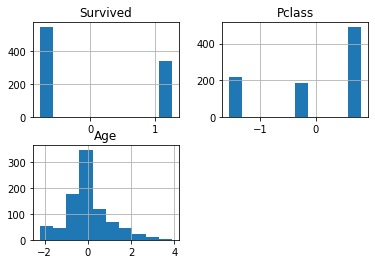

In [46]:
dfScaled.hist(bins=10)

## Gaussian transformation                                          

   ### Robust Scalar (mean - quantile )
   
   > x_scaled = X(i) - Xmedian / IQR
       
       IQR = q3 - q1 (75th percentile - 25th percentile)

In [47]:
t = pd.read_csv("titanic.csv",usecols=["Survived","Pclass","Age"])

In [48]:
t["Age"]=t["Age"].fillna(t.Age.median())

In [49]:
t.isnull().sum()

Survived    0
Pclass      0
Age         0
dtype: int64

<AxesSubplot:>

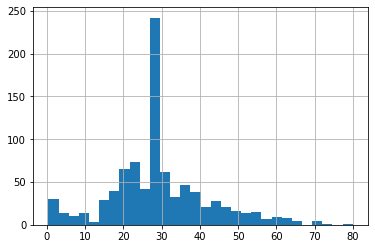

In [51]:
t["Age"].hist(bins=30)

In [52]:
from sklearn.preprocessing import RobustScaler

In [53]:
rob = RobustScaler()

In [54]:
x_scaled = pd.DataFrame(rob.fit_transform(t),columns=t.columns)

In [55]:
x_scaled.head()

,Survived,Pclass,Age
0,0.0,0.0,-0.461538
1,1.0,-2.0,0.769231
2,1.0,0.0,-0.153846
3,1.0,-2.0,0.538462
4,0.0,0.0,0.538462


array([[<AxesSubplot:title={'center':'Survived'}>,
        <AxesSubplot:title={'center':'Pclass'}>],
       [<AxesSubplot:title={'center':'Age'}>, <AxesSubplot:>]],
      dtype=object)

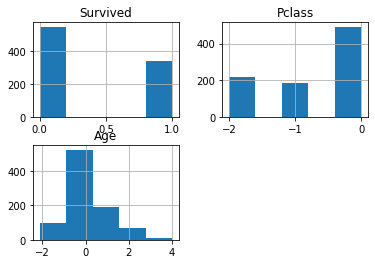

In [56]:
x_scaled.hist(bins=5)

### reciprocal scalling 

> x_scaled = 1 / X(i)

In [ ]:
df=pd.read_csv('titanic.csv',usecols=['Age','Survived'])

In [63]:
df["Age"]=df["Age"].fillna(df.Age.median())

In [64]:
df.head()

,Survived,Pclass,Age
0,0,3,22.0
1,1,1,38.0
2,1,3,26.0
3,1,1,35.0
4,0,3,35.0


In [58]:
import scipy.stats as stat
import pylab 
import matplotlib.pyplot as plt 

In [61]:
# stat.probplot(df["Age"],dist='norm',plot=pylab)

In [62]:
# checking the distribution of the feature in dataset
def QQ_plot(df, feature):
    plt.figure(figsize=(10,7))
    plt.subplot(1,2,1)
    df[feature].hist()
    #plotting histogram in one fig
    #plotting qq plot in other fig
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist="norm",plot=pylab)
    plt.show()

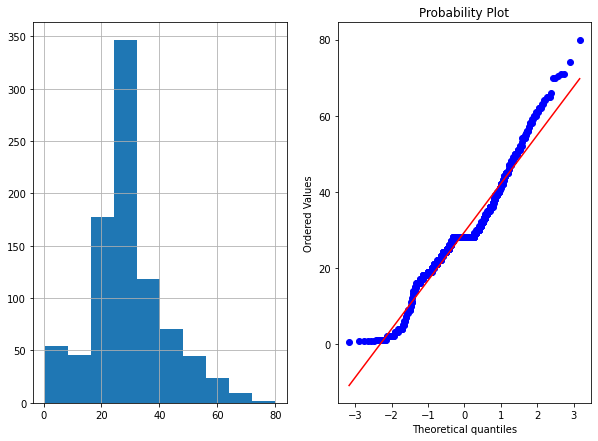

In [65]:
QQ_plot(df,"Age")

In [66]:
df["rec_age"]=1/df["Age"]

In [67]:
df.head()

,Survived,Pclass,Age,rec_age
0,0,3,22.0,0.045455
1,1,1,38.0,0.026316
2,1,3,26.0,0.038462
3,1,1,35.0,0.028571
4,0,3,35.0,0.028571


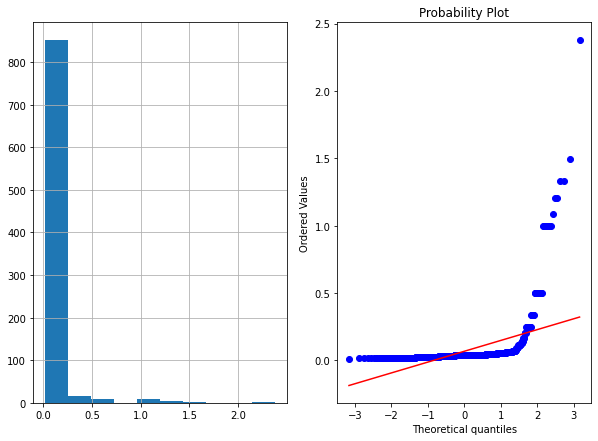

In [69]:
# reciprocal transformation 

QQ_plot(df,"rec_age")

### logarithmic transformation


X_scaled = log(X(i))

In [70]:
import numpy as np
df["log_age"] = np.log(df["Age"])

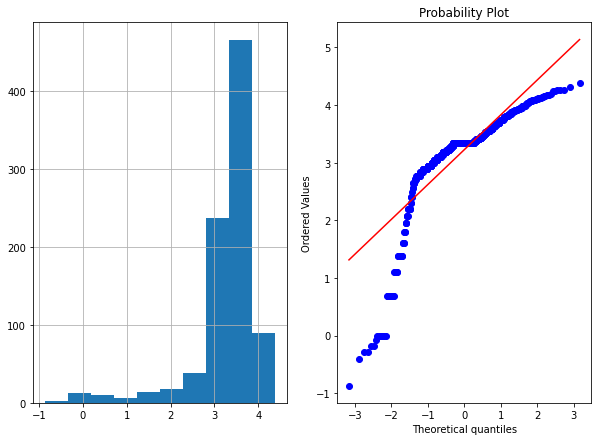

In [71]:
QQ_plot(df,"log_age")

### square root transformation

X_scaled = np.sqrt(X(i))                          
            X(i)**1/2

In [72]:
df["sqrt_age"] = np.sqrt(df["Age"])

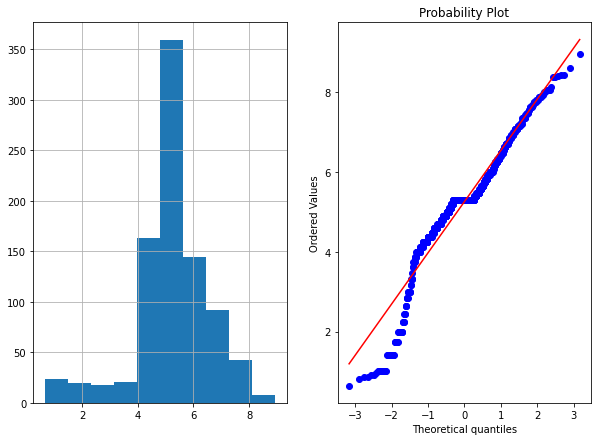

In [73]:
QQ_plot(df,"sqrt_age")

### exponential transformation 

x_scaled = np.exp( X(i))  


math.exp(X(i))                                              



1e(X(i))

In [74]:
df["exp_age"] = np.exp(df["Age"])

In [75]:
df

,Survived,Pclass,Age,rec_age,log_age,sqrt_age,exp_age
0,0,3,22.0,0.045455,3.091042,4.690416,3.584913e+09
1,1,1,38.0,0.026316,3.637586,6.164414,3.185593e+16
2,1,3,26.0,0.038462,3.258097,5.099020,1.957296e+11
3,1,1,35.0,0.028571,3.555348,5.916080,1.586013e+15
4,0,3,35.0,0.028571,3.555348,5.916080,1.586013e+15
...,...,...,...,...,...,...,...
886,0,2,27.0,0.037037,3.295837,5.196152,5.320482e+11
887,1,1,19.0,0.052632,2.944439,4.358899,1.784823e+08
888,0,3,28.0,0.035714,3.332205,5.291503,1.446257e+12
889,1,1,26.0,0.038462,3.258097,5.099020,1.957296e+11


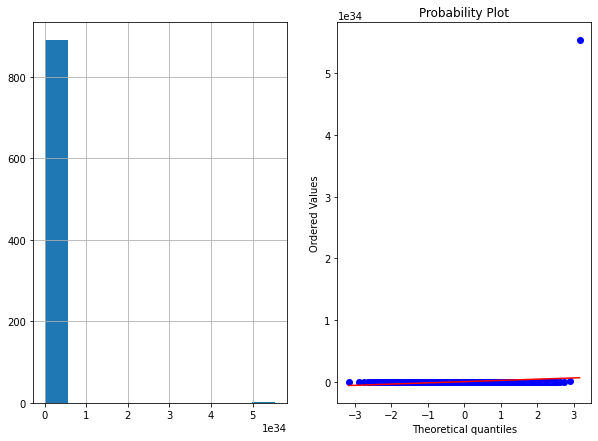

In [76]:
QQ_plot(df,"exp_age")

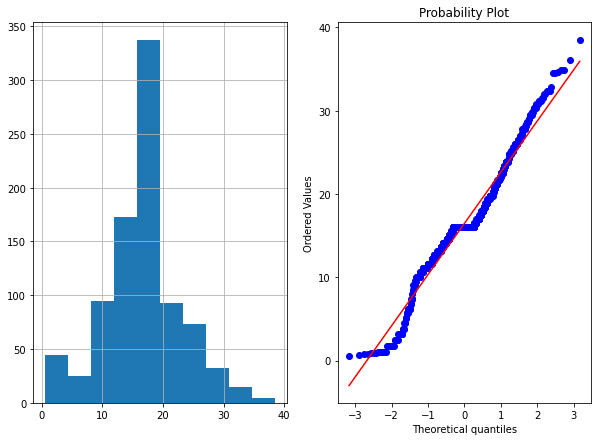

In [77]:
df['Age_exponential']=df.Age**(1/1.2)
QQ_plot(df,'Age_exponential')

### Box Cox transformation                                


X_scaled =(X exp(λ)−1)/λ                                                                    
    λ varies from -5 to 5.all values of λ are considered and the optimal value for a given variable is selected                         

In [84]:
### power transform the raw data
# power = PowerTransformer(method='yeo-johnson', standardize=True)

In [86]:
df["boxcox_age"],lambdas=stat.boxcox(df["Age"])

In [87]:
lambdas

0.7964531473656952

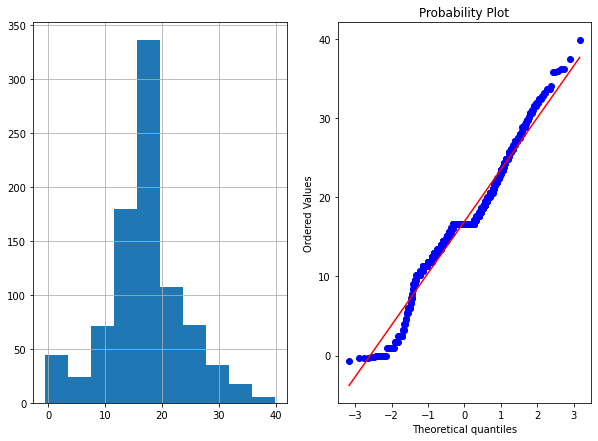

In [88]:
QQ_plot(df,"boxcox_age")

other transformation like 
powertranformation(both boxcox and yeo johnson are in powertransformation library)

sonar(for binary )